In [80]:
import sys
sys.path.append("../")
import pandas as pd
import plotly.graph_objects as go
import datetime as dt
from plotting import CandlePlot

In [81]:
from infrastructure.instrument_collection import instrumentCollection as ic

In [82]:
pair = "EUR_USD"
granularity = "H4"
df = pd.read_pickle(f"../data/{pair}_{granularity}.pkl")
MA_LIST = [10, 20, 50, 100, 200]

In [83]:
df.columns

Index(['time', 'volume', 'mid_o', 'mid_h', 'mid_l', 'mid_c', 'bid_o', 'bid_h',
       'bid_l', 'bid_c', 'ask_o', 'ask_h', 'ask_l', 'ask_c'],
      dtype='object')

In [84]:
df_ma = df[['time', 'mid_o', 'mid_h', 'mid_l', 'mid_c']].copy()

In [85]:
df_ma.head()

,time,mid_o,mid_h,mid_l,mid_c
0,2021-05-12 01:00:00+00:00,1.21381,1.21382,1.21156,1.21204
1,2021-05-12 05:00:00+00:00,1.21203,1.21439,1.21200,1.21345
2,2021-05-12 09:00:00+00:00,1.21346,1.21468,1.20720,1.21300
3,2021-05-12 13:00:00+00:00,1.21302,1.21524,1.20656,1.20664
4,2021-05-12 17:00:00+00:00,1.20662,1.20826,1.20656,1.20726


In [86]:
# get 10 ma
for ma in MA_LIST:
    df_ma[f"MA_{ma}"] = df_ma.mid_c.rolling(window=ma).mean()
df_ma.dropna(inplace=True)
df_ma.reset_index(inplace=True, drop=True)

In [87]:
df_plot =df_ma.iloc[:500]


In [88]:
cp = CandlePlot(df_plot)

In [89]:
traces = [ f"MA_{x}" for x in MA_LIST ]

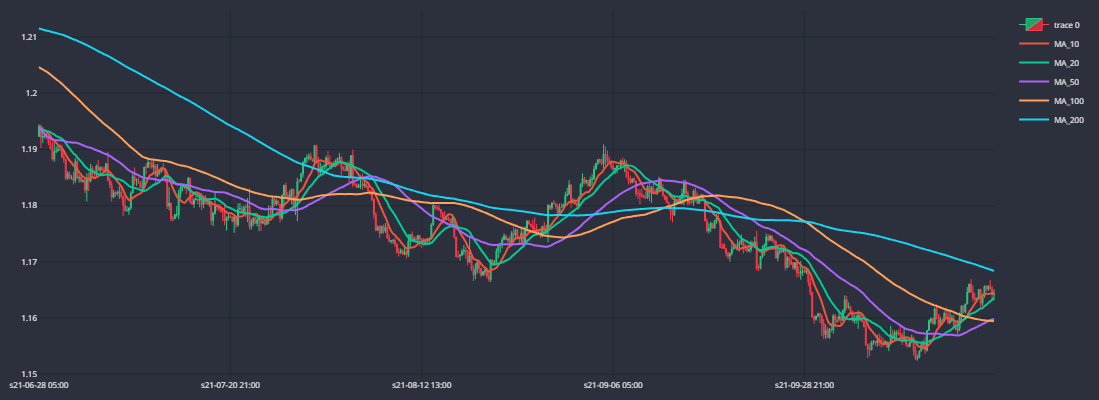

In [90]:
# cp.fig.add_trace(go.Scatter(
#     x =  cp.df_plot.sTime,
#     y =  cp.df_plot.MA_10,
#     line = dict(width=2),
#     line_shape = "spline",
#     name="MA_10"
    
# ))
cp.show_plot(line_traces=traces)

In [91]:
MA_S = "MA_10"
MA_L = "MA_20"
BUY = 1
SELL = -1
NONE = 0

In [92]:
df_an = df_ma[['time', 'mid_o', 'mid_h', 'mid_l', 'mid_c', MA_S, MA_L]].copy()

In [93]:
df_an.head()

,time,mid_o,mid_h,mid_l,mid_c,MA_10,MA_20
0,2021-06-28 05:00:00+00:00,1.19228,1.19447,1.19220,1.19414,1.193744,1.193521
1,2021-06-28 09:00:00+00:00,1.19416,1.19439,1.19024,1.19216,1.193648,1.193533
2,2021-06-28 13:00:00+00:00,1.19214,1.19398,1.19112,1.19228,1.193565,1.193483
3,2021-06-28 17:00:00+00:00,1.19226,1.19292,1.19200,1.19244,1.193439,1.193336
4,2021-06-28 21:00:00+00:00,1.19252,1.19304,1.19178,1.19192,1.193199,1.193253


In [94]:
df_an['DELTA'] = df_an.MA_10 - df_an.MA_20
df_an['DELTA_PREV'] = df_an.DELTA.shift(1)

In [95]:
def is_trade(row):
    if row.DELTA >= 0  and row.DELTA_PREV < 0:
        return BUY
    elif row.DELTA < 0  and row.DELTA_PREV >= 0:
        return SELL
    return NONE

In [105]:
df_an['TRADE'] = df_an.apply(is_trade, axis=1)

In [106]:
df_trades = df_an[df_an.TRADE != NONE].copy()

In [107]:
df_trades.head()

,time,mid_o,mid_h,mid_l,mid_c,MA_10,MA_20,DELTA,DELTA_PREV,TRADE
4,2021-06-28 21:00:00+00:00,1.19252,1.19304,1.19178,1.19192,1.193199,1.193253,-0.000054,0.000104,-1
33,2021-07-05 17:00:00+00:00,1.18678,1.18700,1.18612,1.18637,1.185643,1.185385,0.000258,-0.000026,1
40,2021-07-06 21:00:00+00:00,1.18240,1.18250,1.18155,1.18210,1.184705,1.184885,-0.000180,0.000172,-1
55,2021-07-09 09:00:00+00:00,1.18323,1.18688,1.18288,1.18687,1.183254,1.182605,0.000650,-0.000155,1
68,2021-07-13 13:00:00+00:00,1.17996,1.18330,1.17918,1.18044,1.184944,1.185155,-0.000211,0.000410,-1


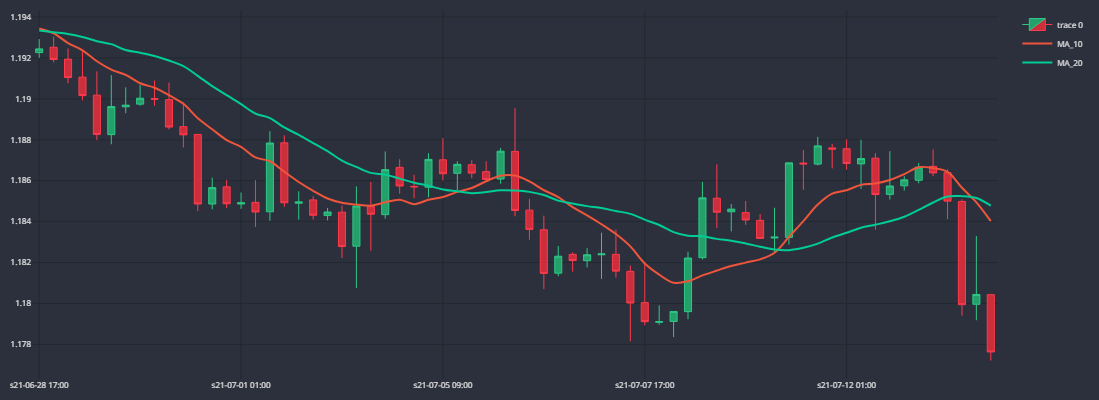

In [108]:
cp = CandlePlot(df_an.iloc[3:70])
cp.show_plot(line_traces=[MA_S, MA_L])

In [109]:
# df.groupby(stuff...).sum(numeric_only=True)

In [110]:
ic.LoadInstruments("../data")

In [112]:
ins_data = ic.instruments_dict[pair]

In [121]:
df_trades.head()

,time,mid_o,mid_h,mid_l,mid_c,MA_10,MA_20,DELTA,DELTA_PREV,TRADE,DIFF,GAIN
4,2021-06-28 21:00:00+00:00,1.19252,1.19304,1.19178,1.19192,1.193199,1.193253,-0.000054,0.000104,-1,-0.00555,55.5
33,2021-07-05 17:00:00+00:00,1.18678,1.18700,1.18612,1.18637,1.185643,1.185385,0.000258,-0.000026,1,-0.00427,-42.7
40,2021-07-06 21:00:00+00:00,1.18240,1.18250,1.18155,1.18210,1.184705,1.184885,-0.000180,0.000172,-1,0.00477,-47.7
55,2021-07-09 09:00:00+00:00,1.18323,1.18688,1.18288,1.18687,1.183254,1.182605,0.000650,-0.000155,1,-0.00643,-64.3
68,2021-07-13 13:00:00+00:00,1.17996,1.18330,1.17918,1.18044,1.184944,1.185155,-0.000211,0.000410,-1,0.00072,-7.2


In [122]:
df_trades['DIFF'] = df_trades.mid_c.diff().shift(-1)
df_trades.fillna(0, inplace=True)

In [120]:
df_trades['GAIN'] = df_trades['DIFF'] / ins_data.pipLocation
df_trades['GAIN'] = df_trades['GAIN'] * df_trades['TRADE'] 

In [123]:
df_trades.GAIN.sum()

-1430.6000000000108

In [124]:
df_trades['GAIN_C'] = df_trades['GAIN'].cumsum()

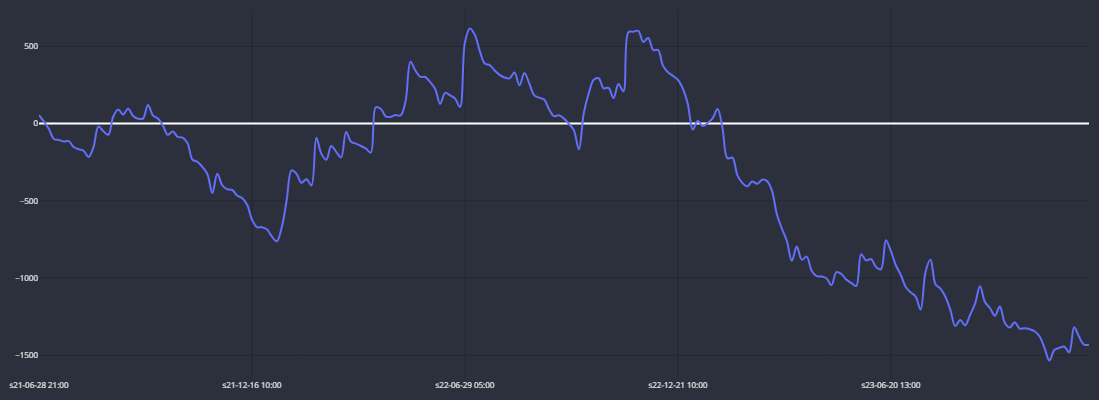

In [125]:
cp = CandlePlot(df_trades, candles=False)
cp.show_plot(line_traces=['GAIN_C'])